In [1]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--j3p-content-font-size4);
    background-color:#FF7F50;
    color: white;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

 img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 100px 70px 150px 70px; 
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(173, 216, 230, 1) 0 6px 6px rgba(0, 0, 255, 1.0
173, 216, 230, 1);
        }
video {
    width: 820px; /* Set the width of the video */
    height: auto; /* Adjust the height automatically */
    border-radius: 25px; /* Add a border radius for rounded corners */
    border: 5px solid #eee; /* Add a border */
    box-shadow: 0 10px 20px rgba(173, 216, 230, 1), 0 6px 6px rgba((0, 0, 255, 1.0)); /* Add a box shadow */
    display: flex;
    controls: autoplay;
    align-items: center;
    justify-content: center;
    transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
  }

  video:active {
    box-shadow: 0 10px 20px rgba(173, 216, 230, 1), 0 6px 6px rgba();
  }


</style>
''')  

## Automate price Prediction :

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [3]:
# read the data :

data=pd.read_csv("Automobile_data.csv")
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [4]:
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [6]:
data.select_dtypes("number").head(10)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
5,2,99.8,177.3,66.3,53.1,2507,136,8.5,19,25
6,1,105.8,192.7,71.4,55.7,2844,136,8.5,19,25
7,1,105.8,192.7,71.4,55.7,2954,136,8.5,19,25
8,1,105.8,192.7,71.4,55.9,3086,131,8.3,17,20
9,0,99.5,178.2,67.9,52.0,3053,131,7.0,16,22


In [4]:
#get info about the dataset:
print(data.info())
print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset -->>",np.shape(data))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
#get the statistical:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [6]:
# get Types of features:

data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
# cleaning the data:
def contains_q(row):
     for col in data.columns:
         row[col]=row[col]=="?"
     return row    


In [8]:
data.apply(contains_q,axis=1).mean()

symboling            0.000000
normalized-losses    0.200000
make                 0.000000
fuel-type            0.000000
aspiration           0.000000
num-of-doors         0.009756
body-style           0.000000
drive-wheels         0.000000
engine-location      0.000000
wheel-base           0.000000
length               0.000000
width                0.000000
height               0.000000
curb-weight          0.000000
engine-type          0.000000
num-of-cylinders     0.000000
engine-size          0.000000
fuel-system          0.000000
bore                 0.019512
stroke               0.019512
compression-ratio    0.000000
horsepower           0.009756
peak-rpm             0.009756
city-mpg             0.000000
highway-mpg          0.000000
price                0.019512
dtype: float64

In [9]:
# to know which column contain ? :
for col in data.columns:
    print(f"counts of items in {col} -->> \n {data[col].value_counts()}")
    print("-"*25)

counts of items in symboling -->> 
 symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64
-------------------------
counts of items in normalized-losses -->> 
 normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64
-------------------------
counts of items in make -->> 
 make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            1

In [10]:
# replace ? with NaN values in all Data :

df=data.replace("?",np.nan)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [11]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<Axes: ylabel='Frequency'>

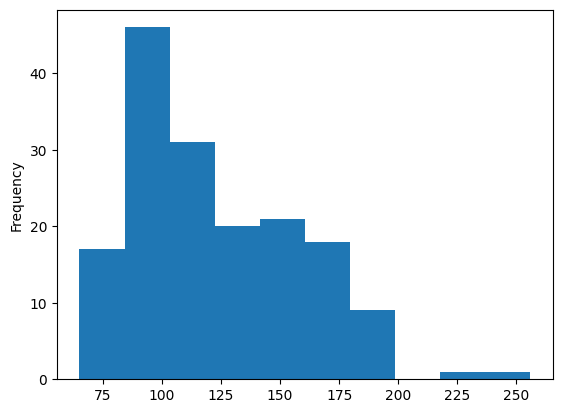

In [12]:
data['normalized-losses'].replace('?', np.nan).astype('float').plot.hist()

In [13]:
# translate ? in normalized-loss column into [Q]

data["normalized-losses"] = data["normalized-losses"].replace('?', '[Q]')
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,[Q],alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,[Q],alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,[Q],alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [14]:
data = data.replace('?', np.nan)

In [15]:
data=data.dropna()
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,[Q],alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,[Q],alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,[Q],alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [16]:
data.isna().mean()

symboling            0.0
normalized-losses    0.0
make                 0.0
fuel-type            0.0
aspiration           0.0
num-of-doors         0.0
body-style           0.0
drive-wheels         0.0
engine-location      0.0
wheel-base           0.0
length               0.0
width                0.0
height               0.0
curb-weight          0.0
engine-type          0.0
num-of-cylinders     0.0
engine-size          0.0
fuel-system          0.0
bore                 0.0
stroke               0.0
compression-ratio    0.0
horsepower           0.0
peak-rpm             0.0
city-mpg             0.0
highway-mpg          0.0
price                0.0
dtype: float64

In [17]:
# predict nan values in normalize column base on other columns :
nanorm = data[data['normalized-losses'] == '[Q]']
nanorm


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,[Q],alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,[Q],alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,[Q],alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,[Q],audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,[Q],audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
14,1,[Q],bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,[Q],bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,[Q],bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,[Q],bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
43,0,[Q],isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785


In [18]:
fullnorm = data[data['normalized-losses'] != '[Q]']
fullnorm

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [19]:
# make a simple model using sklearn to predict missing values in a column based on other columns

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(fullnorm[['symboling', 'wheel-base', 'length', 'width', 'height']], fullnorm['normalized-losses'])

f = model.predict(nanorm[['symboling', 'wheel-base', 'length', 'width', 'height']])

In [20]:
nanorm['normalized-losses'] = f.round().astype('int64')

/tmp/ipykernel_11144/3316821278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nanorm['normalized-losses'] = f.round().astype('int64')


In [21]:
# concatinate the two dataframes
new_data = pd.concat([nanorm, fullnorm], axis = 0)

In [22]:
new_data = new_data.reset_index().drop('index', axis = 1)

<Axes: ylabel='Frequency'>

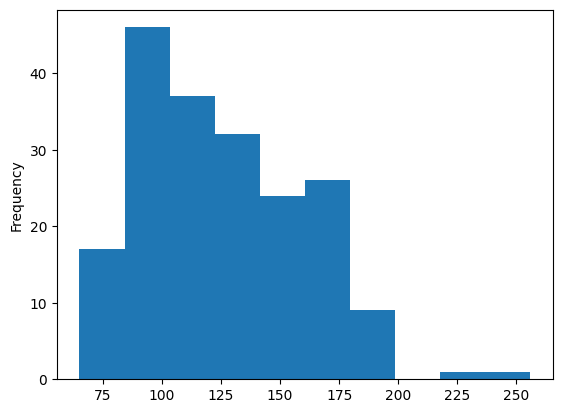

In [23]:
new_data['normalized-losses'].astype('float').plot.hist()

In [32]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

## Asighment :

In [7]:
def find_outliers(df, threshold=3):
    
    z_scores = np.abs((df - df.mean()) / df.std())
    
    outlier_rows = z_scores.any(axis=1)
    return df.index[outlier_rows],z_scores

find_outliers(data.select_dtypes("number"))

(Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        ...
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204],
       dtype='int64', length=205),
      symboling  wheel-base    length     width    height  curb-weight  \
 0     1.739213    1.686643  0.425480  0.842719  2.015483     0.014531   
 1     1.739213    1.686643  0.425480  0.842719  2.015483     0.014531   
 2     0.133183    0.706865  0.230948  0.190101  0.542200     0.513625   
 3     0.936198    0.173274  0.206750  0.136209  0.235366     0.419770   
 4     0.936198    0.106848  0.206750  0.229440  0.235366     0.515545   
 ..         ...         ...       ...       ...       ...          ...   
 200   1.472847    1.717669  1.195622  1.394830  0.726460     0.761377   
 201   1.472847    1.717669  1.195622  1.348215  0.726460     0.947672   
 202   1.472847    1.717669  1.195622  1.394830  0.726460     0.876611   
 203   1.472847    1.717669  1.195622  1.394830  0.726460     1.270327   
 204   1.472847    1.7

In [25]:
def find_row_outliers(df):

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    print(Q1)
    print("-"*30)
    print(Q3)
    print("-"*30)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_rows = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
    

    return df.index[outlier_rows]


outlier_indices = find_row_outliers(data.select_dtypes("number"))
print("Indices of rows containing outliers:", outlier_indices)
print(type(outlier_indices))
print("-"*30)


symboling               0.0
wheel-base             94.5
length                166.3
width                  64.1
height                 52.0
curb-weight          2145.0
engine-size            98.0
compression-ratio       8.5
city-mpg               19.0
highway-mpg            25.0
Name: 0.25, dtype: float64
------------------------------
symboling               2.0
wheel-base            102.4
length                184.6
width                  66.9
height                 55.7
curb-weight          2952.0
engine-size           146.0
compression-ratio       9.4
city-mpg               30.0
highway-mpg            34.0
Name: 0.75, dtype: float64
------------------------------
Indices of rows containing outliers: Index([  6,   7,   8,  18,  29,  30,  47,  48,  49,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  82,  83,  84,  90, 108, 110, 112, 114, 116, 117,
       124, 158, 159, 174, 182, 184, 187, 192, 203],
      dtype='int64')
<class 'pandas.core.indexes.base.Index'>
------------------

upper_limit :  44.48990971937635
lower_limit :  6.162940021556295
Mean Value :  25.326424870466322
Median Value :  25.0
1st Standard Deviation :  6.387828282970009


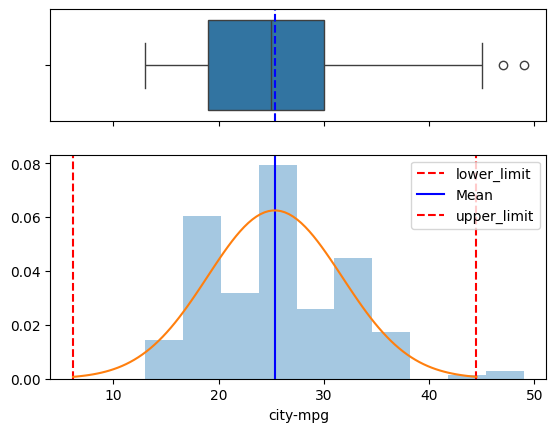

In [33]:
#calculate outlier on fractal_dimension_mean feature:-
# We can see that Distibution in this feature follow Standard Normal Distribution N -> (0,1)

from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data["city-mpg"].mean()
std = data["city-mpg"].std()
median = data["city-mpg"].median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["city-mpg"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["city-mpg"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()